<a href="https://colab.research.google.com/github/amarismail522/Deep_Learning_Projects/blob/main/cats_dogs_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
!pwd
!unzip '/content/drive/MyDrive/DeepLearning-projects/dogs-vs-cats.zip'
sourceZipFile = '/content/drive/MyDrive/DeepLearning-projects/dogs-vs-cats.zip'
print(os.path.exists(sourceZipFile))

/content
Archive:  /content/drive/MyDrive/DeepLearning-projects/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               
True


In [3]:
!unzip train.zip
!unzip test1.zip
!mkdir source_data
!mv train source_data
!mv test1 source_data

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [4]:
!mv sampleSubmission source_data
!mv source_data/test1 source_data/test
!ls source_data/train

Streaming output truncated to the last 5000 lines.
cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg 

In [5]:
!rm -Rf cats_and_dogs_small


In [6]:
#Copying images to training, validation and test directories

import os, shutil

def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = 'source_data/train'
modelStoragePath = 'drive/My Drive/'

base_dir = '/content/cats_and_dogs_small'
createIfNot(base_dir)

train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)

test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [9]:
#Building network
#Instantiating a small convent for dogs vs. cats classification

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
#Configuring the model for training 

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Data Preprocessing
#Using ImageDataGenerator to read images from directories

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
steps_per_epoch = 2000//batch_size
validation_steps = 1000//batch_size

In [ ]:
#Fitting the model using a batch generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 98s 969ms/step - loss: 0.6888 - acc: 0.5315 - val_loss: 0.6757 - val_acc: 0.5930
Epoch 2/30
100/100 [==============================] - 97s 968ms/step - loss: 0.6533 - acc: 0.6250 - val_loss: 0.6334 - val_acc: 0.6340
Epoch 3/30
100/100 [==============================] - 97s 969ms/step - loss: 0.6072 - acc: 0.6670 - val_loss: 0.6063 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 97s 971ms/step - loss: 0.5640 - acc: 0.7085 - val_loss: 0.5920 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 97s 972ms/step - loss: 0.5350 - acc: 0.7270 - val_loss: 0.6266 - val_acc: 0.6420
Epoch 6/30
100/100 [==============================] - 97s 971ms/step - loss: 0.5080 - acc: 0.7485 - val_loss: 0.5713 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 97s 973ms/step - loss: 0.4761 - acc: 0.7685 - val_loss: 0.6320 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 9

In [ ]:
#Saving the model

model.save('cats_and_dogs_small_1.h5')

model using simple cnn


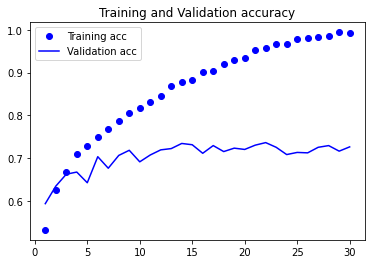

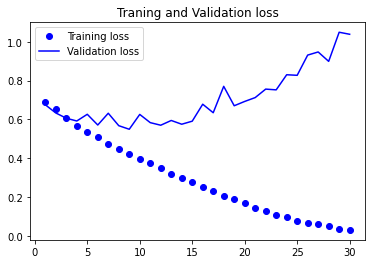

In [ ]:
#Displaying curves of loss and accuracy during training
print('model using simple cnn')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and Validation loss')
plt.legend()

plt.show()

In [ ]:
#After adding regularization
from tensorflow.keras import regularizers

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
#Configuring the model for training 

model1.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Fitting the model using a batch generator

history = model1.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 100s 987ms/step - loss: 1.3543 - acc: 0.5310 - val_loss: 1.1370 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 97s 972ms/step - loss: 1.0173 - acc: 0.5855 - val_loss: 0.9223 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 97s 971ms/step - loss: 0.8737 - acc: 0.6340 - val_loss: 0.8454 - val_acc: 0.6260
Epoch 4/30
100/100 [==============================] - 98s 977ms/step - loss: 0.7963 - acc: 0.6910 - val_loss: 0.7873 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 98s 985ms/step - loss: 0.7316 - acc: 0.7125 - val_loss: 0.7627 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 98s 983ms/step - loss: 0.6854 - acc: 0.7355 - val_loss: 0.7304 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 98s 984ms/step - loss: 0.6482 - acc: 0.7560 - val_loss: 0.7011 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 

In [ ]:
#Saving the model

model1.save('cats_and_dogs_small_1.h5')

model using simple cnn and regularization


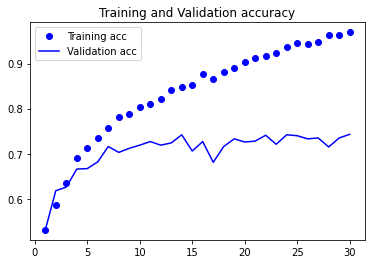

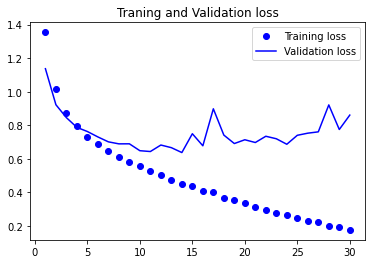

In [ ]:
#Displaying curves of loss and accuracy during training
print('model using simple cnn and regularization')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and Validation loss')
plt.legend()

plt.show()

**Using Data Augmentation**

In [11]:
#Setting up a data augmentation configuration via ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) 

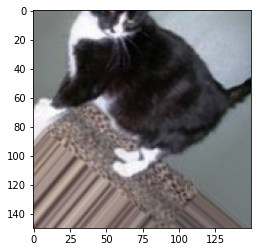

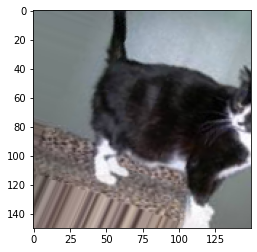

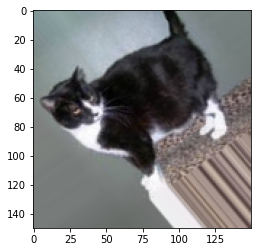

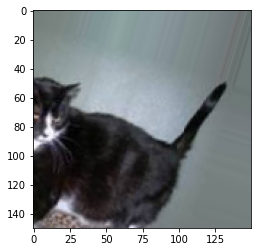

In [12]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0:
    break

plt.show()

In [15]:
from tensorflow.python.keras.layers.convolutional import Conv2D
#Defining a new convent that includes dropout

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Training the convent using data-augmentation generators
batch_size = 32
steps_per_epoch = 2000//batch_size
validation_steps = 1000//batch_size

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

history = model2.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
62/62 [==============================] - 122s 2s/step - loss: 0.6936 - acc: 0.5091 - val_loss: 0.6844 - val_acc: 0.5736
Epoch 2/100
62/62 [==============================] - 116s 2s/step - loss: 0.6836 - acc: 0.5564 - val_loss: 0.6722 - val_acc: 0.5685
Epoch 3/100
62/62 [==============================] - 116s 2s/step - loss: 0.6814 - acc: 0.5752 - val_loss: 0.6615 - val_acc: 0.6028
Epoch 4/100
62/62 [==============================] - 116s 2s/step - loss: 0.6722 - acc: 0.5833 - val_loss: 0.6657 - val_acc: 0.5948
Epoch 5/100
62/62 [==============================] - 117s 2s/step - loss: 0.6556 - acc: 0.5960 - val_loss: 0.6498 - val_acc: 0.6099
Epoch 6/100
62/62 [==============================] - 117s 2s/step - loss: 0.6547 - acc: 0.6113 - val_loss: 0.6334 - val_acc: 0.6421
Epoch 7/100
62/62 [==============================] - 117s 2s/step - loss: 0.6472 - acc: 0.6235 - val_loss: 0.6305 - val_acc: 0.6300
Epoch 8/100
62/62 [==============================] - 116s 2s/step - loss: 0.